In [4]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import datetime as dt
    from scipy.stats import zscore
    import warnings
    warnings.filterwarnings('ignore')

    # Load the dataset
    coffee_data = pd.read_csv('D:\\index.csv')

    # Display the first few rows
    print("Initial Data Head:")
    print(coffee_data.head())

    # Display data information
    print("\nData Info:")
    coffee_data.info()

    # Check for missing values
    print("\nMissing Values:")
    print(coffee_data.isnull().sum())

    # Check for duplicates
    print("\nDuplicate Rows:")
    print(coffee_data.duplicated().sum())

    # Descriptive statistics for numerical column
    print("\nDescriptive Statistics for 'money':")
    print(coffee_data.describe().T)

    # Descriptive statistics for categorical columns
    print("\nDescriptive Statistics for Categorical Columns:")
    print(coffee_data.loc[:,['cash_type','card','coffee_name']].describe().T)


Initial Data Head:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money      

In [5]:
    # Convert date and datetime to datetime format
    coffee_data['date'] = pd.to_datetime(coffee_data['date'])
    coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'])

    # Check the data types after conversion
    print("\nData Types after Conversion:")
    print(coffee_data.dtypes)
    


Data Types after Conversion:
date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object


In [6]:
    # Remove outliers based on Z-score for 'money'
    # Calculate Z-scores for the 'money' column
    z_scores = np.abs(zscore(coffee_data['money']))

    # Define a threshold (e.g., 3 standard deviations)
    threshold = 3

    # Filter out rows where the Z-score of 'money' is greater than the threshold
    coffee_data_cleaned = coffee_data[z_scores < threshold].copy()

    print(f"\nOriginal data shape: {coffee_data.shape}")
    print(f"Cleaned data shape (after outlier removal): {coffee_data_cleaned.shape}")
    


Original data shape: (1133, 6)
Cleaned data shape (after outlier removal): (1133, 6)


In [7]:
    # Create column of Month, Weekdays, and Hours
    coffee_data_cleaned['month'] = coffee_data_cleaned['date'].dt.strftime('%Y-%m')
    coffee_data_cleaned['day'] = coffee_data_cleaned['date'].dt.strftime('%w') # %w for weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
    coffee_data_cleaned['hour'] = coffee_data_cleaned['datetime'].dt.strftime('%H')

    print("\nData Head after Feature Engineering:")
    print(coffee_data_cleaned.head())
    


Data Head after Feature Engineering:
        date                datetime cash_type                 card  money  \
0 2024-03-01 2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1 2024-03-01 2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2 2024-03-01 2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3 2024-03-01 2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4 2024-03-01 2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name    month day hour  
0          Latte  2024-03   5   10  
1  Hot Chocolate  2024-03   5   12  
2  Hot Chocolate  2024-03   5   12  
3      Americano  2024-03   5   13  
4          Latte  2024-03   5   13  


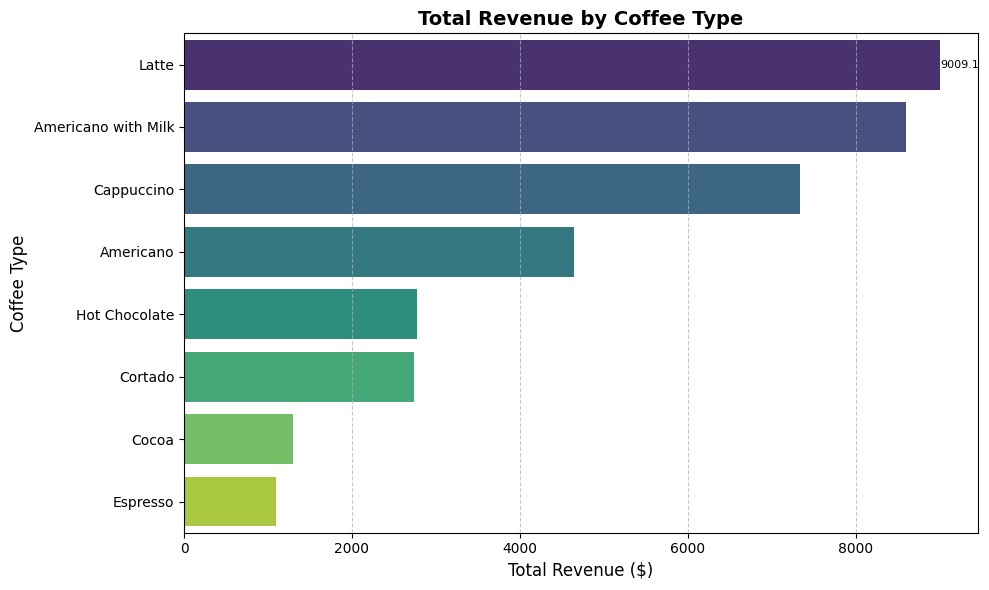

In [8]:
    revenue_data = coffee_data_cleaned.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)

    plt.figure(figsize=(10,6))
    ax = sns.barplot(data=revenue_data, x='money', y='coffee_name', palette='viridis')
    ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=8)
    plt.xlabel('Total Revenue (\$)', fontsize=12)
    plt.ylabel('Coffee Type', fontsize=12)
    plt.title('Total Revenue by Coffee Type', fontsize=14, fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    

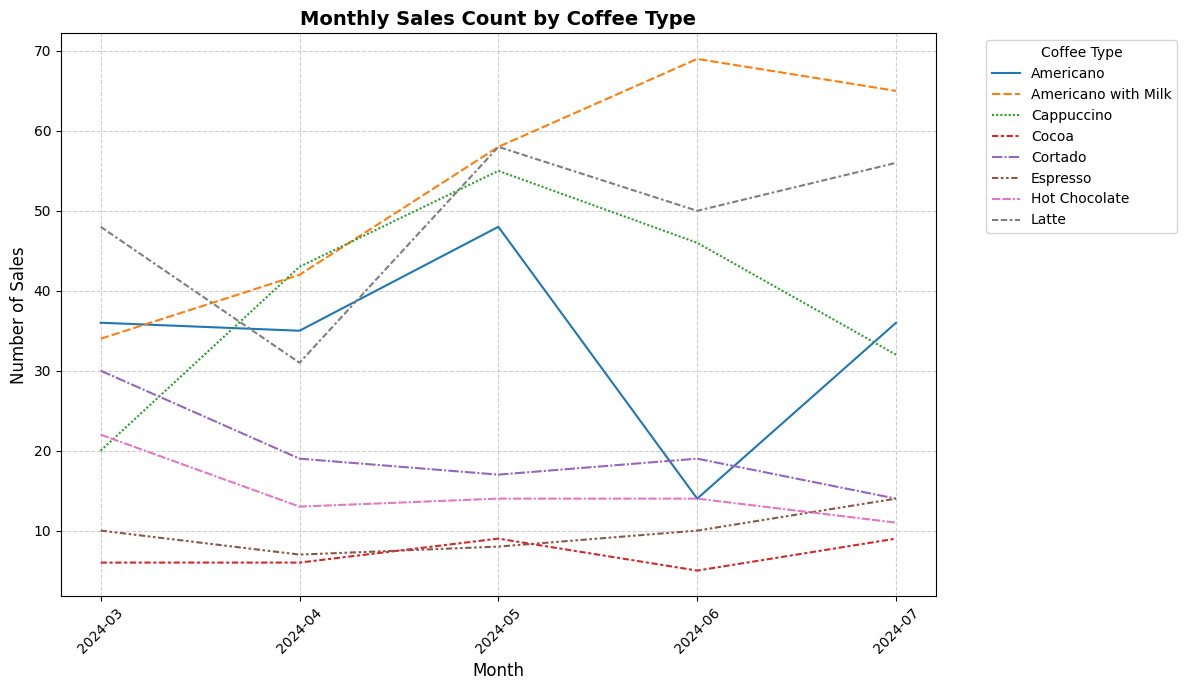

In [9]:
    monthly_sales = coffee_data_cleaned.groupby(['coffee_name','month']).size().reset_index(name='count')
    monthly_sales_pivot = monthly_sales.pivot(index='month', columns='coffee_name', values='count').fillna(0).reset_index()

    plt.figure(figsize=(12,7))
    sns.lineplot(data=monthly_sales_pivot.set_index('month'))
    plt.title('Monthly Sales Count by Coffee Type', fontsize=14, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Sales', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    

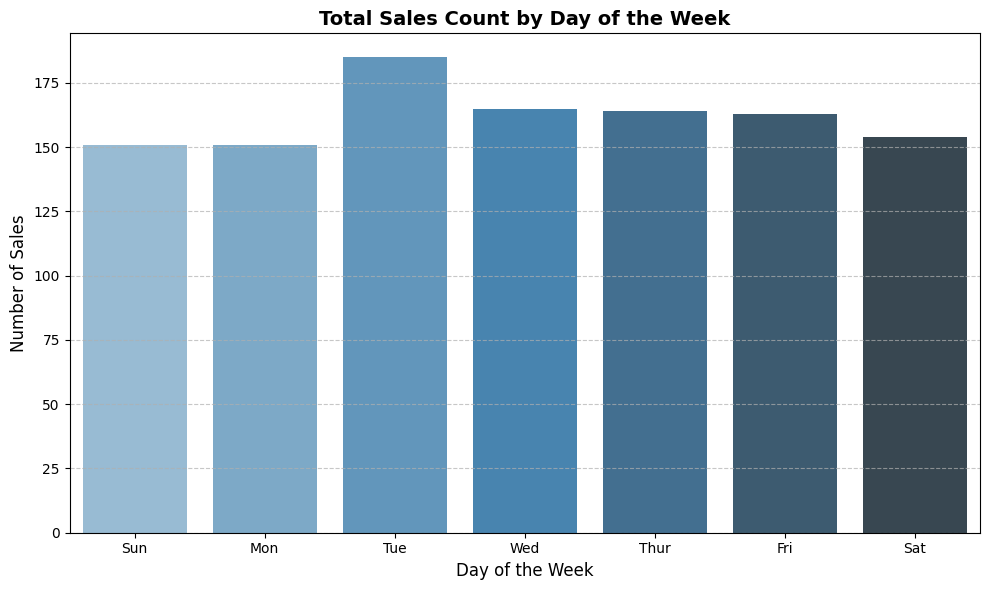

In [10]:
    weekday_sales = coffee_data_cleaned.groupby(['day']).size().reset_index(name='count')
    # Map numerical day to actual day names
    day_names = ['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']
    weekday_sales['day_name'] = weekday_sales['day'].astype(int).map(lambda x: day_names[x])

    plt.figure(figsize=(10,6))
    sns.barplot(data=weekday_sales, x='day_name', y='count', palette='Blues_d', order=day_names)
    plt.title('Total Sales Count by Day of the Week', fontsize=14, fontweight='bold')
    plt.xlabel('Day of the Week', fontsize=12)
    plt.ylabel('Number of Sales', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    

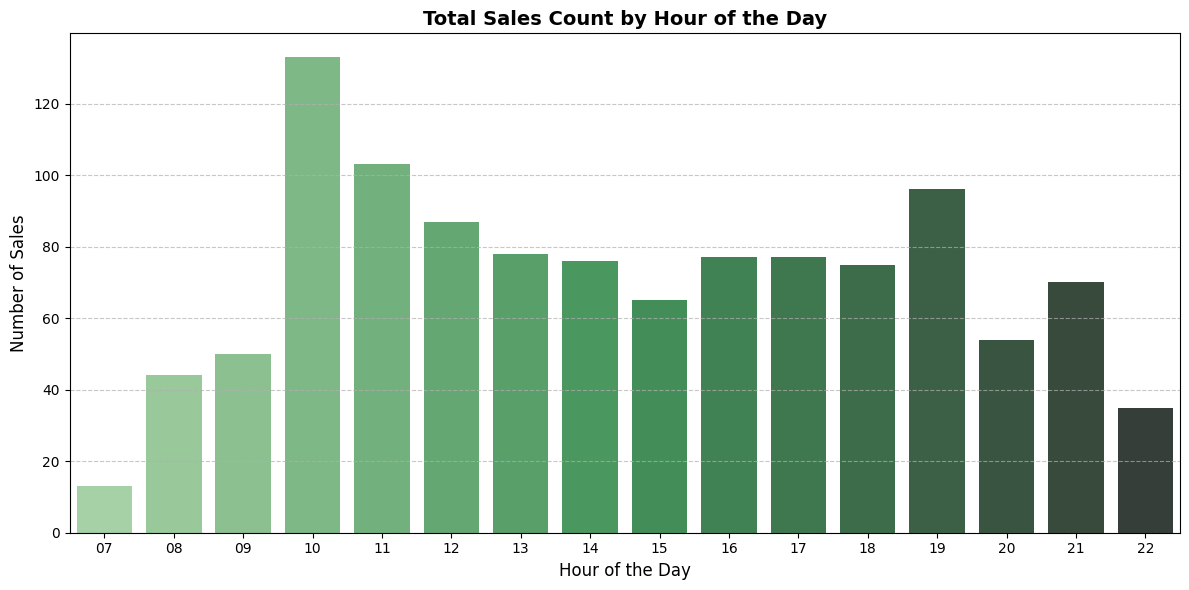

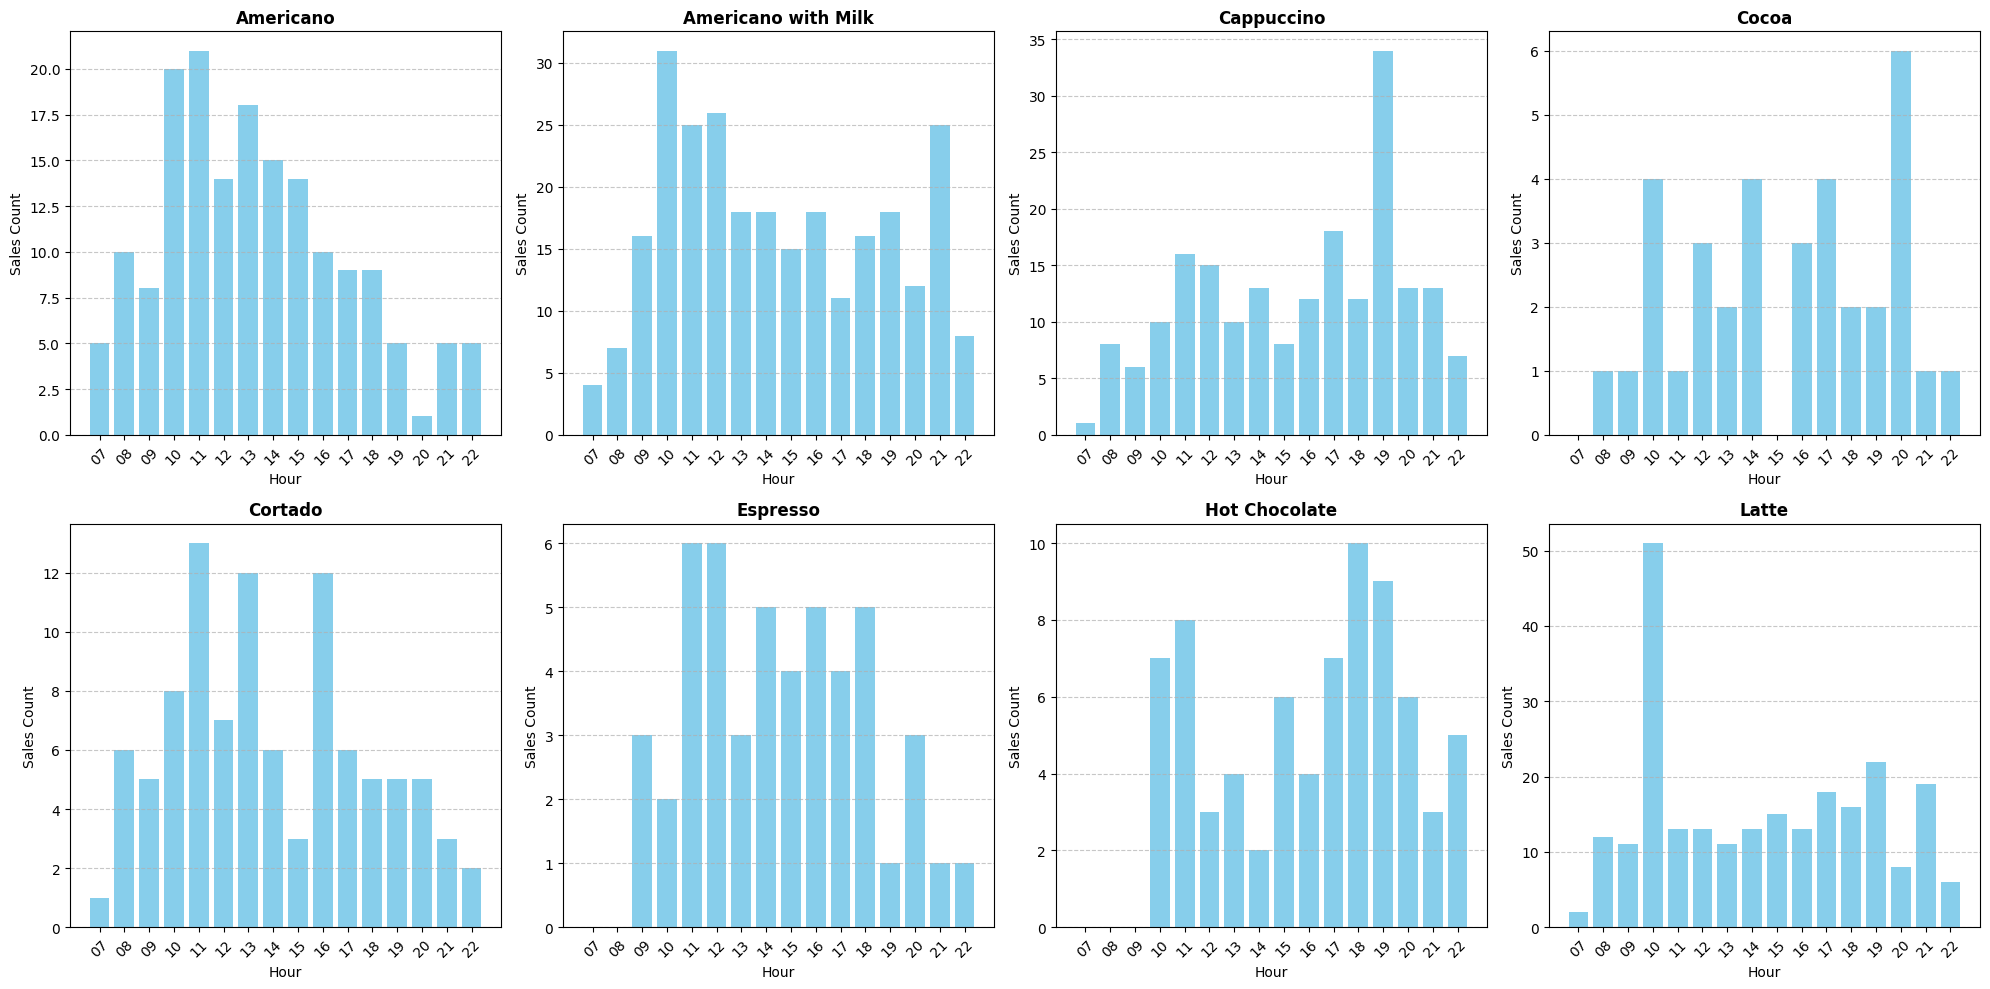

In [11]:
    hourly_sales = coffee_data_cleaned.groupby(['hour']).size().reset_index(name='count')

    plt.figure(figsize=(12,6))
    sns.barplot(data=hourly_sales, x='hour', y='count', palette='Greens_d')
    plt.title('Total Sales Count by Hour of the Day', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Number of Sales', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    hourly_sales_by_coffee = coffee_data_cleaned.groupby(['hour','coffee_name']).size().reset_index(name='count')
    hourly_sales_by_coffee_pivot = hourly_sales_by_coffee.pivot(index='hour', columns='coffee_name', values='count').fillna(0).reset_index()

    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    axs = axs.flatten()

    for i, column in enumerate(hourly_sales_by_coffee_pivot.columns[1:]):
        axs[i].bar(hourly_sales_by_coffee_pivot['hour'], hourly_sales_by_coffee_pivot[column], color='skyblue')
        axs[i].set_title(f'{column}', fontsize=12, fontweight='bold')
        axs[i].set_xlabel('Hour', fontsize=10)
        axs[i].set_ylabel('Sales Count', fontsize=10)
        axs[i].tick_params(axis='x', rotation=45)
        axs[i].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
    

In [12]:
    # Aggregate daily sales
    daily_total_sales = coffee_data_cleaned.groupby('date')['money'].sum().reset_index()
    daily_total_sales.columns = ['date', 'total_sales']

    # Create features for time series prediction (e.g., day of week, day of month, month)
    daily_total_sales['day_of_week'] = daily_total_sales['date'].dt.dayofweek # Monday=0, Sunday=6
    daily_total_sales['day_of_month'] = daily_total_sales['date'].dt.day
    daily_total_sales['month'] = daily_total_sales['date'].dt.month
    daily_total_sales['week_of_year'] = daily_total_sales['date'].dt.isocalendar().week.astype(int)

    print("\nDaily Total Sales Data Head for ML:")
    print(daily_total_sales.head())
    


Daily Total Sales Data Head for ML:
        date  total_sales  day_of_week  day_of_month  month  week_of_year
0 2024-03-01        396.3            4             1      3             9
1 2024-03-02        228.1            5             2      3             9
2 2024-03-03        349.1            6             3      3             9
3 2024-03-04        135.2            0             4      3            10
4 2024-03-05        338.5            1             5      3            10


In [13]:
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score

    # Define features (X) and target variable (y)
    X = daily_total_sales[['day_of_week', 'day_of_month', 'month', 'week_of_year']]
    y = daily_total_sales['total_sales']

    # Split the data into training and test sets
    # Using a time-based split is more appropriate for time series, but for simplicity,
    # we'll use train_test_split as in the example.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\nX_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    


X_train shape: (120, 4)
X_test shape: (30, 4)


In [14]:
    # Initialize the model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\nMean Squared Error (MSE): {mse:.2f}')
    print(f'R^2 Score: {r2:.2f}')
    


Mean Squared Error (MSE): 9942.10
R^2 Score: -0.10


In [15]:
    coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
    print("\nModel Coefficients:")
    print(coefficients)
    


Model Coefficients:
              Coefficient
day_of_week    -21.316417
day_of_month    23.800545
month          657.553028
week_of_year  -150.447102
